## Flower Species Prediction

In [9]:
#importing necessary libraries
import pandas as pd
import matplotlib as plt
import numpy as np
import sklearn as sk
import scipy as sp

In [10]:
#checkx if importation was successful
print(plt.__version__)
print(pd.__version__)
print(np.__version__)
print(sk.__version__)
print(sp.__version__)



3.5.2
1.4.4
1.21.5
1.0.2
1.9.1


### Data Gathering

In [13]:
#loadin dataset required

link = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length', 'sepal_width', 'petal_length','petal_width', 'class']

data = pd.read_csv(link,names = names)

In [78]:
#verifying if it was loaded correctly 
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Cleaning & Assessment

Now let's take a peekat our data and summarize our data

In [21]:
#Dimensions
data.shape

(150, 5)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [79]:
data.sample(20)

,sepal_length,sepal_width,petal_length,petal_width,class
20,5.4,3.4,1.7,0.2,Iris-setosa
125,7.2,3.2,6.0,1.8,Iris-virginica
55,5.7,2.8,4.5,1.3,Iris-versicolor
115,6.4,3.2,5.3,2.3,Iris-virginica
95,5.7,3.0,4.2,1.2,Iris-versicolor
28,5.2,3.4,1.4,0.2,Iris-setosa
99,5.7,2.8,4.1,1.3,Iris-versicolor
123,6.3,2.7,4.9,1.8,Iris-virginica
47,4.6,3.2,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [33]:
sum(data.duplicated())

3

In [36]:
data[data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [25]:
#statistical summary 
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
data.groupby('class').count()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


After having a look at our data, it seems to have no tidiness nor quality issues that require cleaning. There are no null values, inaccurate data types, wrong entries nor out of place values. we can proceed to visualise it in order to find patterns and relationships between our variables

### Data visualisation

let's look at the relationship between attributes with some univariate plots

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

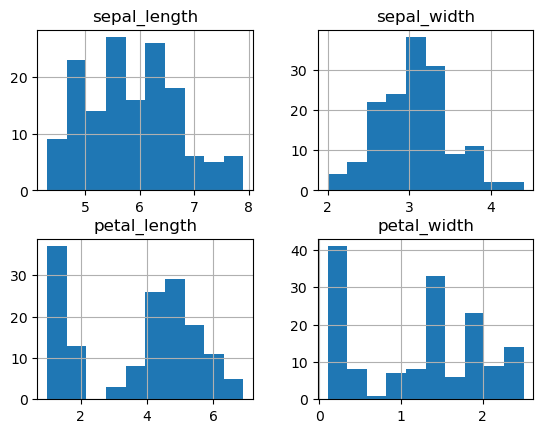

In [38]:
data.hist()

sepal_length       AxesSubplot(0.125,0.53;0.352273x0.35)
sepal_width     AxesSubplot(0.547727,0.53;0.352273x0.35)
petal_length       AxesSubplot(0.125,0.11;0.352273x0.35)
petal_width     AxesSubplot(0.547727,0.11;0.352273x0.35)
dtype: object

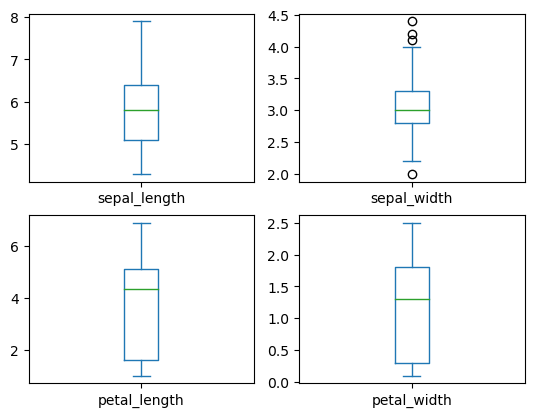

In [43]:
data.plot(kind='box',subplots=True,layout=(2,2))

Two of the input variables(sepal length and sepal width) seem to have a gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption. <br>

Now let's look at the relationship between the variables with some multivariate plots


array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

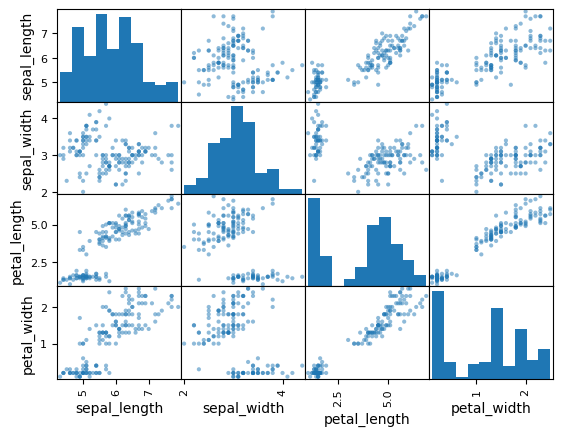

In [52]:
pd.plotting.scatter_matrix(data)

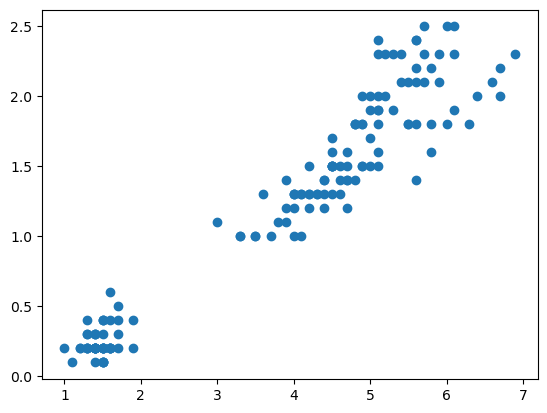

In [46]:
plt.pyplot.scatter(data=data,x='petal_length', y='petal_width');

We can observe a correlation between the variables petal_length and petal_width, hence a predictable relationship

### Algorithm Evaluation

Now let's create some models for prediction and access their accuracy on unseen data to predict the species of flower involved. This is going to be done in the following steps: 

<ol>
    <li>Seperate out a validation test</li>
    <li>Set up the test harness to use 10-fold cross validation</li>
    <li>Build multiple models to predict the species of flower measurements</li>
    <li>Select the best model</li></ol>

#### Step 1 . Seperate out validation test

In [54]:
from sklearn.model_selection import train_test_split #to create train n test data


#converting dataframe to array to select data

array = data.values
x = array[:,0:4]
y = array[:,4]

#inspect the structure of our data
print(x.shape)
print(y.shape)

#train n test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
    

(150, 4)
(150,)
(120, 4)
(120,)
(30, 4)
(30,)


#### Step 2. Set up the test harness to use 10-fold cross validation

we will use the stratified k fold cross validation model by splitting our dataset into 10 groups so as to asses the skill of the different models used in this study. Stratified here implies we will aim to have the same distribution of example by class as exist in the wholetraining dataset in each fold/split/sample.

we will be using the metric of accuracy to evaluate the models.

#### Step 3. Build Models

Let's build a couple of models and assess which could be the best for our prediction

Upon visualising the relationship between the variables in our dataset, we could see some of the classes are partially linearly seperable hence we should obtain quite some good results. We will be testing 6 different algorithms, which is a good mix of linear and non linear algorithms


In [64]:
#loadin libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#creatx array to store the different models' result

models =[]
models.append(('Log_R', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

#evaluating each model in turn

results= []
names = []

for name,model in models:
    #applying our cv model
    kfold = StratifiedKFold(n_splits=10,random_state=1, shuffle=True)
    #collectx results
    cv_results = cross_val_score(model,x_train,y_train,cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: Mean=%f (Std=%f)' % (name, cv_results.mean(),cv_results.std()))

Log_R: Mean=0.958333 (Std=0.055902)
DTC: Mean=0.950000 (Std=0.055277)
KNN: Mean=0.958333 (Std=0.055902)
LDA: Mean=0.983333 (Std=0.033333)
NB: Mean=0.966667 (Std=0.040825)
SVM: Mean=0.975000 (Std=0.038188)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

we now have 6 models and accuracy estimations for each. Let'scompare them and select the most appropriate

#### Step 4 .  Select the best model

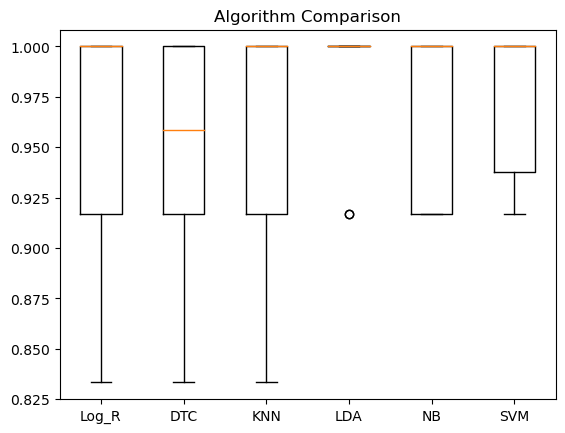

In [66]:
#compare algorithms
plt.pyplot.boxplot(results, labels = names)
plt.pyplot.title('Algorithm Comparison')
plt.pyplot.show()

We can see that the box and whisker plots are squashed at the top of the range , with many evaluations achieving 100% accuracy and some down into the high 80% accuracies. For this study, we can see that LDA(linear Discriminant Analysis) has the largest accuracy score of about 0.983 or 98.3%, making it most sitable for our predictions

### Testing/Making Predictions

Our results led us to believe that LDA is the most suitable model for our study. Let's use it on our test data to get an idea of the accuracy of our model, to be sure that our overly optimistic results were not dueto issues like overfitting or data leak.

In [72]:
model = SVC(gamma='auto')
model.fit(x_train,y_train)
predictions = model.predict(x_test)

#calculatin accuracy
acc = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)
cr = classification_report(y_test, predictions)
print("Predictions: ",predictions)
print("Accuracy: ", acc)
print(cm)
print(cr)

Predictions:  ['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica']
Accuracy:  0.9666666666666667
[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



We can see that the accuracy is about 0.9666 on the test data. We also have our confusion matrix which provides an indication of the errors made and a classification report, which provides a breakdown of each class by precision, recall, f1-score and support showing excellent results.